**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изученеие файлов с данными, загрузка библиотек.](#info1)
* [2. Получение общей информации.](#info2)
* [3. Нахождение и ликвидация пропусков.](#info3)

***Часть 2. Подготовка данных:***
* [1. Переименование столбцов.](#preparation1)
* [2. Нахождение и ликвидация дубликатов.](#preparation2)
* [3. Приведение данных к нужным типам.](#preparation3)

***Часть 3. Исследовательский анализ:***
* [1. Построение графиков.](#analysis1)
* [2. Категориальные графики.](#analysis2)

***Часть 4. Корреляционный анализ:***
* [1. Построение тепловой карты.](#correlation)
* [2. Диаграммы рассеяиния.](#sсatter)

***Часть 5. Модель линейной регрессии:***
* [1. Обучение нескольких моделей.](#model1)
* [2. Оценка и выбор лучшей модели.](#metrics1)
* [3. Применение модели для получения результата.](#result1)

***Часть 6. Модель логистической регрессии:***
* [1. Обучение модели.](#model2)
* [2. Оценка модели.](#metrics2)
* [3. Применение модели для получения результата.](#result2)

***[Часть 7. Вывод.](#conclusion)***

## Изучение общей информации

<a id='info1'></a>
### Загрузка библиотек

In [1]:
!pip install phik -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
import os
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

RANDOM_STATE = 42
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
model_lr = LinearRegression()
clf = LogisticRegression()
le = LabelEncoder()

### Загрузка данных

In [3]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

<a id='info2'></a>
### Обзор данных

In [4]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [5]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [6]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [7]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [8]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [9]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Ознакомились с 3-мя полученными датасетами, на первый взгляд пропусков не обнаружено, замечены неявные дубликаты в столбце "Тип пастбища" в таблице 'ferma_main', нужно будет проверить все строковые стобцы на дубликаты. Также привести названия колон и их типы в удобный для работы вид.

<a id='info3'></a>
### Поиск пропусков

In [10]:
ferma_main.isna().sum()

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

In [11]:
ferma_dad.isna().sum()

id          0
Имя Папы    0
dtype: int64

In [12]:
cow_buy.isna().sum()

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

##  Предобработка данных

<a id='preparation1'></a>
### Переименование столбцов

In [13]:
ferma_main.columns = ferma_main.columns.str.lower()
ferma_main.columns

Index(['id', 'удой, кг', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'порода',
       'тип пастбища', 'порода папы_быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')

In [14]:
ferma_main = ferma_main.rename(
    columns={
        'удой, кг': 'удой',
        'эке (энергетическая кормовая единица)': 'эке',
        'сырой протеин, г': 'сырой_протеин',
        'спо (сахаро-протеиновое соотношение)': 'спо',
        'тип пастбища': 'тип_пастбища',
        'порода папы_быка': 'порода_папы_быка',
        'жирность,%': 'жирность',
        'белок,%': 'белок',
        'вкус молока': 'вкус_молока'
        }
)

In [15]:
ferma_dad = ferma_dad.rename(columns={'Имя Папы': 'имя_папы'})

In [16]:
cow_buy = cow_buy.rename(columns={
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы_быка',
    'Текущая_жирность,%': 'текущая_жирность',
    'Текущий_уровень_белок,%': 'текущий_белок',
})
cow_buy.columns = cow_buy.columns.str.lower()

<a id='preparation2'></a>
### Поиск и удаление дубликатов

In [17]:
ferma_main.duplicated().sum()

5

In [18]:
ferma_main = ferma_main.drop_duplicates()

In [19]:
display(ferma_main['порода'].unique())
display(ferma_main['тип_пастбища'].unique())
display(ferma_main['порода_папы_быка'].unique())
display(ferma_main['вкус_молока'].unique())
ferma_main['возраст'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

array(['вкусно', 'не вкусно'], dtype=object)

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [20]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные', 'Равнинное', regex=True)
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал', regex=True)

In [21]:
display(ferma_dad['имя_папы'].unique())
ferma_dad.duplicated().sum()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

0

In [22]:
display(cow_buy['порода'].unique())
display(cow_buy['тип_пастбища'].unique())
display(cow_buy['порода_папы_быка'].unique())
display(cow_buy['имя_папы'].unique())
cow_buy['возраст'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

array(['холмистое', 'равнинное'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [23]:
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].str.title()

<a id='preparation3'></a>
### Смена типа данных

In [24]:
ferma_main['эке'] = ferma_main['эке'] .str.replace(',', '.').astype('float')
ferma_main['спо'] = ferma_main['спо'] .str.replace(',', '.').astype('float')
ferma_main['жирность'] = ferma_main['жирность'] .str.replace(',', '.').astype('float')
ferma_main['белок'] = ferma_main['белок'] .str.replace(',', '.').astype('float')

In [25]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


In [26]:
cow_buy['текущая_жирность'] = cow_buy['текущая_жирность'] .str.replace(',', '.').astype('float')
cow_buy['текущий_белок'] = cow_buy['текущий_белок'] .str.replace(',', '.').astype('float')

In [27]:
ferma_main.info()
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --

Провели предобработку данных: нашли и удалили явные и неявные дубликаты, изменили название колонок, привели к нужному типу.

## Исследовательский анализ данных

<a id='analysis1'></a>
### Количественные графики стада фермы

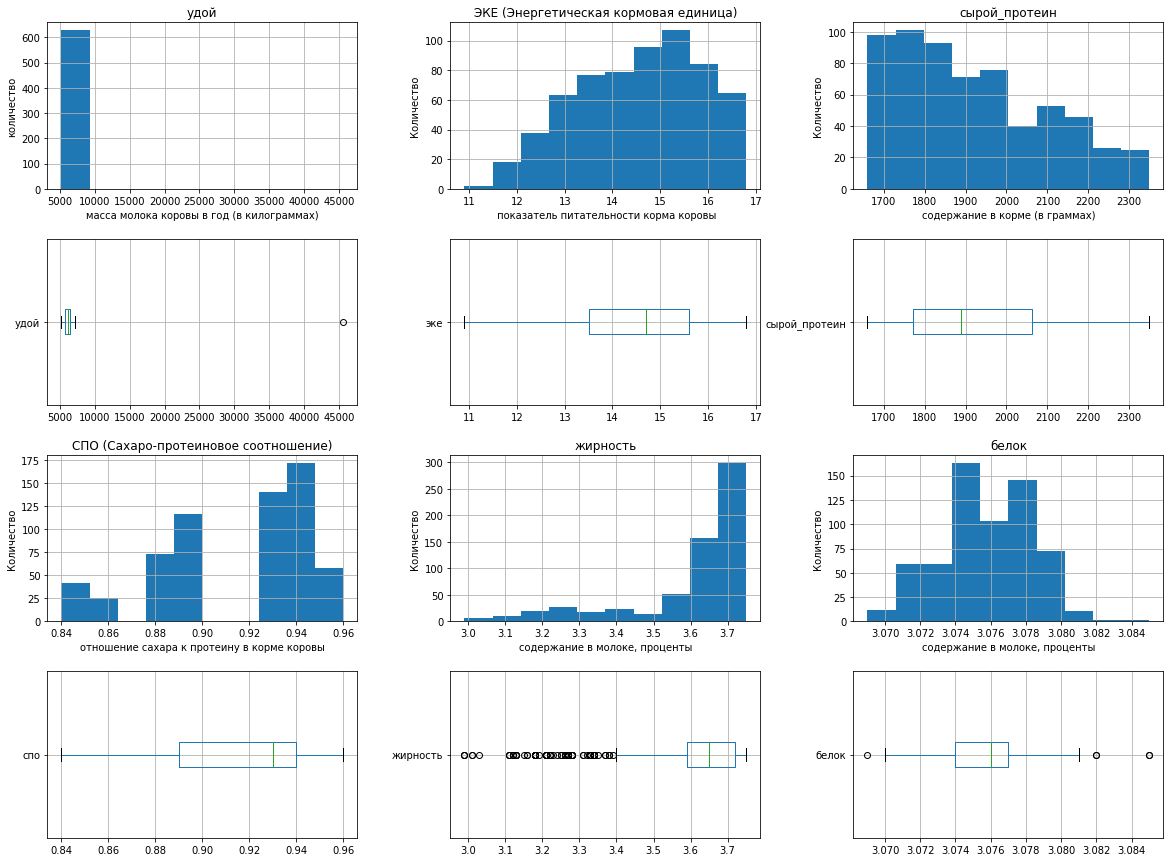

In [28]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ferma_main.hist('удой', ax=ax[0, 0])
ferma_main.boxplot('удой', ax=ax[1, 0], vert=False)
ax[0, 0].set(xlabel='масса молока коровы в год (в килограммах)', ylabel='количество')

ferma_main.hist('эке', ax=ax[0, 1])
ferma_main.boxplot('эке', ax=ax[1, 1], vert=False)
ax[0, 1].set(xlabel=' показатель питательности корма коровы', ylabel='Количество')
ax[0, 1].set(title='ЭКЕ (Энергетическая кормовая единица)')
    
ferma_main.hist('сырой_протеин', ax=ax[0, 2])
ferma_main.boxplot('сырой_протеин', ax=ax[1, 2], vert=False)
ax[0, 2].set(xlabel='содержание в корме (в граммах)', ylabel='Количество')

ferma_main.hist('спо', ax=ax[2, 0])
ferma_main.boxplot('спо', ax=ax[3, 0], vert=False)
ax[2, 0].set(xlabel='отношение сахара к протеину в корме коровы', ylabel='Количество')
ax[2, 0].set(title='СПО (Сахаро-протеиновое соотношение)')

ferma_main.hist('жирность', ax=ax[2, 1])
ferma_main.boxplot('жирность', ax=ax[3, 1], vert=False)
ax[2, 1].set(xlabel='содержание в молоке, проценты', ylabel='Количество')

ferma_main.hist('белок', ax=ax[2, 2])
ferma_main.boxplot('белок', ax=ax[3, 2], vert=False)
ax[2, 2].set(xlabel='содержание в молоке, проценты', ylabel='Количество');

### Количественные графики на покупку

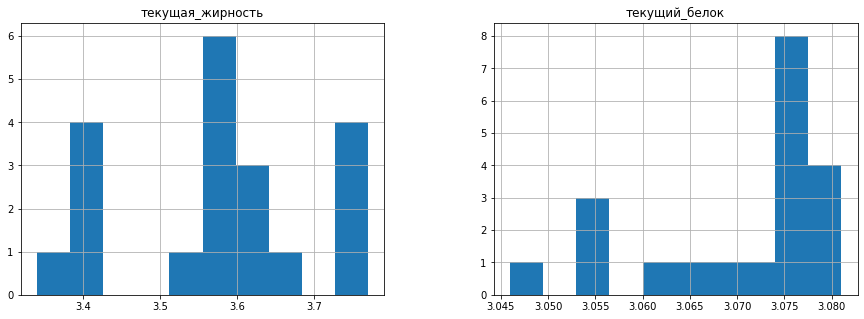

In [30]:
cow_buy.hist(figsize=(15,5));

<a id='analysis2'></a>
### Категориальные графики

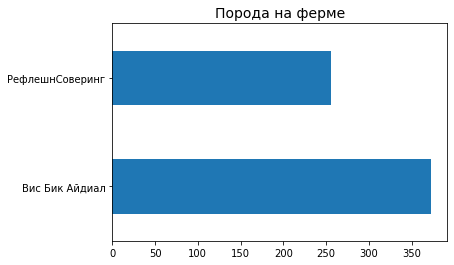

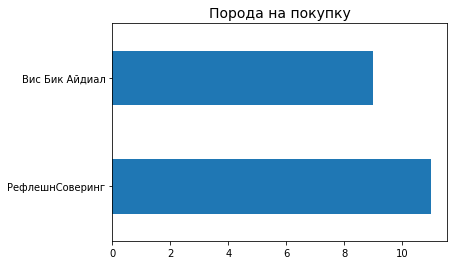

In [31]:
ferma_main['порода'].value_counts().plot(kind='barh')
plt.title('Порода на ферме', fontsize=14)
plt.show()
cow_buy['порода'].value_counts().plot(kind='barh')
plt.title('Порода на покупку', fontsize=14);

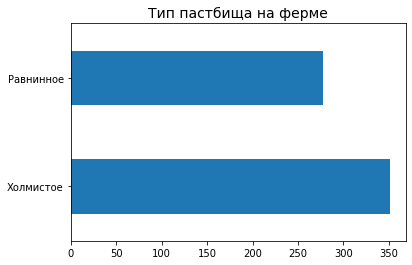

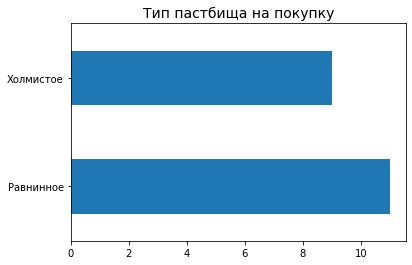

In [32]:
ferma_main['тип_пастбища'].value_counts().plot(kind='barh')
plt.title('Тип пастбища на ферме', fontsize=14)
plt.show()
cow_buy['тип_пастбища'].value_counts().plot(kind='barh')
plt.title('Тип пастбища на покупку', fontsize=14);

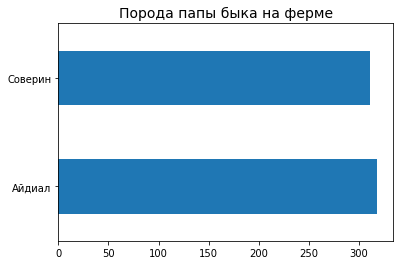

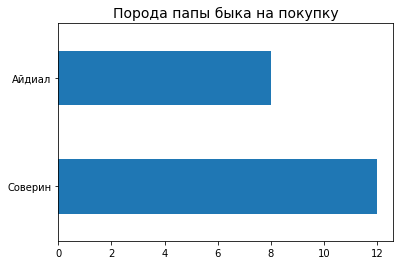

In [33]:
ferma_main['порода_папы_быка'].value_counts().plot(kind='barh')
plt.title('Порода папы быка на ферме', fontsize=14)
plt.show()
cow_buy['порода_папы_быка'].value_counts().plot(kind='barh')
plt.title('Порода папы быка на покупку', fontsize=14);

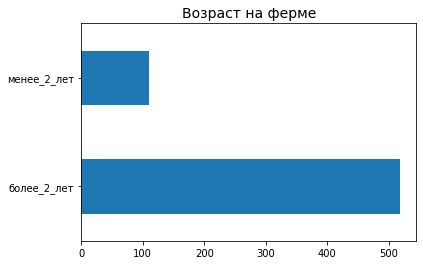

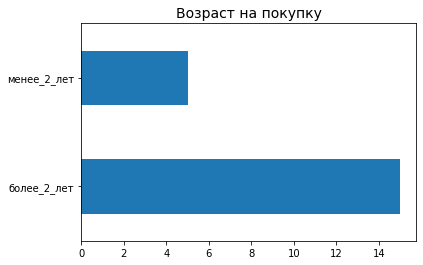

In [34]:
ferma_main['возраст'].value_counts().plot(kind='barh')
plt.title('Возраст на ферме', fontsize=14)
plt.show()
cow_buy['возраст'].value_counts().plot(kind='barh')
plt.title('Возраст на покупку', fontsize=14);

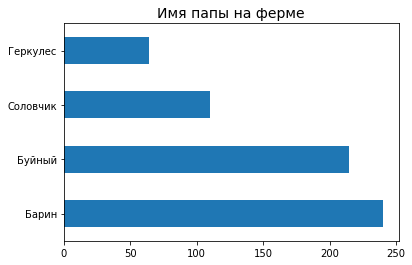

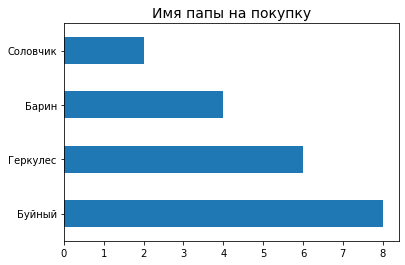

In [35]:
ferma_dad['имя_папы'].value_counts().plot(kind='barh')
plt.title('Имя папы на ферме', fontsize=14)
plt.show()
cow_buy['имя_папы'].value_counts().plot(kind='barh')
plt.title('Имя папы на покупку', fontsize=14);

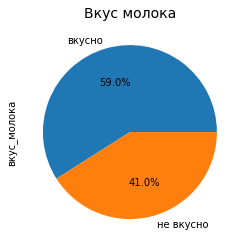

In [36]:
ferma_main['вкус_молока'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Вкус молока', fontsize=14);

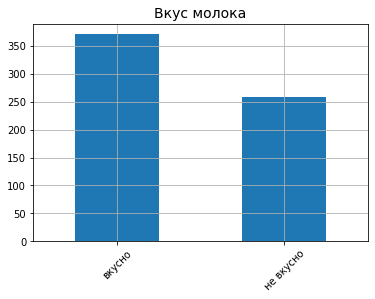

In [37]:
ferma_main['вкус_молока'].value_counts().plot(kind='bar', rot=45, grid=True)
plt.title('Вкус молока', fontsize=14);

In [38]:
ferma_main.pivot_table(index='вкус_молока', columns=['порода','порода_папы_быка','тип_пастбища'], values='id', aggfunc='count')

порода           Вис Бик Айдиал                               РефлешнСоверинг  \
порода_папы_быка         Айдиал             Соверин                    Айдиал   
тип_пастбища          Равнинное Холмистое Равнинное Холмистое       Равнинное   
вкус_молока                                                                     
вкусно                       57        60        33        69              23   
не вкусно                    44        39        53        18              17   

порода                                          
порода_папы_быка             Соверин            
тип_пастбища     Холмистое Равнинное Холмистое  
вкус_молока                                     
вкусно                  48        23        58  
не вкусно               30        28        29

In [39]:
ferma_main.pivot_table(index='вкус_молока', values=['эке', 'спо', 'сырой_протеин'], aggfunc='mean')

,спо,сырой_протеин,эке
вкус_молока,,,
вкусно,0.918208,1945.698113,14.772776
не вкусно,0.905795,1891.248062,14.214729


In [40]:
ferma_main.pivot_table(index='вкус_молока', values=['жирность', 'белок'], aggfunc='mean')

,белок,жирность
вкус_молока,,
вкусно,3.075943,3.616415
не вкусно,3.075279,3.585310


In [41]:
ferma_main['удой'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой, dtype: float64

In [42]:
ferma_main.query('удой > 8000')

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [43]:
ferma_main.loc[ferma_main['id'] == 17, 'удой'] = 5616

In [44]:
ferma_main['удой'].describe()

count     629.000000
mean     6125.157393
std       475.912622
min      5204.000000
25%      5746.000000
50%      6132.000000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64

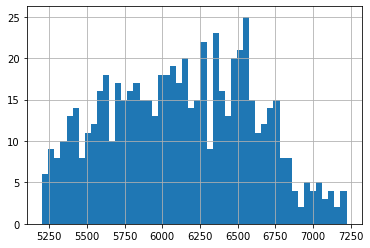

In [45]:
ferma_main['удой'].hist(bins=50);

Вывод: Исследовав данные, в таблице `"удой"` выявили выброс, исправили, видимо опечатка. На первый вгляд больше аномалий не выявлено. Сопоставили категориальные графики на ферме и на покупку. Можно соединить таблицу имен к таблице коров на ферме и оставить только данные с вкусным молоком, где удой выше 6000 кг..

## Корреляционный анализ

<a id='correlation'></a>
### Коэффициенты корреляции `heatmap`

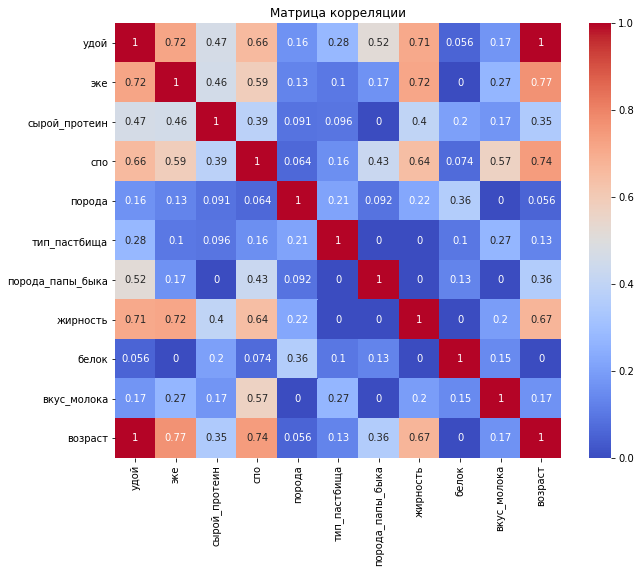

In [46]:
list_columns = ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']
corr_matrix = ferma_main.drop('id', axis=1).phik_matrix(interval_cols = list_columns)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

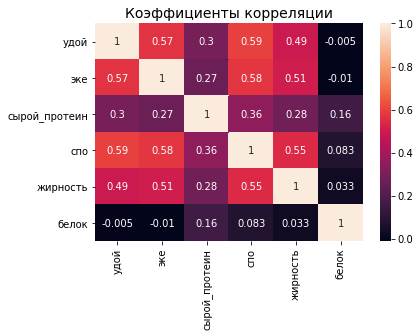

In [47]:
sns.heatmap(ferma_main.drop('id', axis=1).corr(method='kendall'), annot=True)
plt.title('Коэффициенты корреляции', fontsize=14);

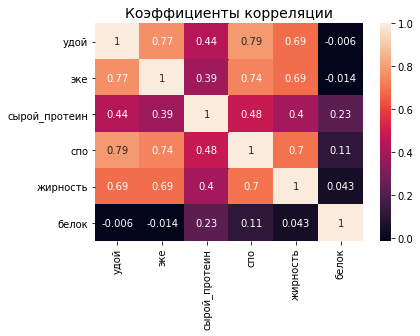

In [48]:
sns.heatmap(ferma_main.drop('id', axis=1).corr(method='spearman'), annot=True)
plt.title('Коэффициенты корреляции', fontsize=14);

<a id='scatter'></a>
### Диаграммы рассеяния  `"Удой"|"Сырой протеин"`

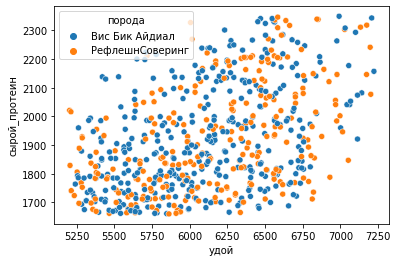

In [49]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue="порода");

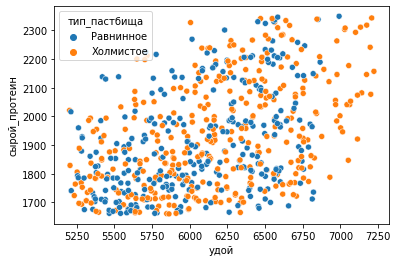

In [50]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue="тип_пастбища");

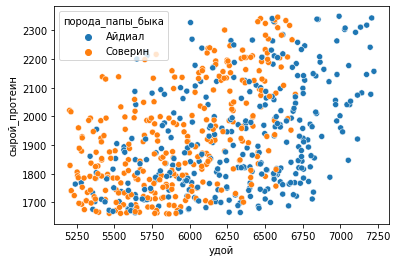

In [51]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue="порода_папы_быка");

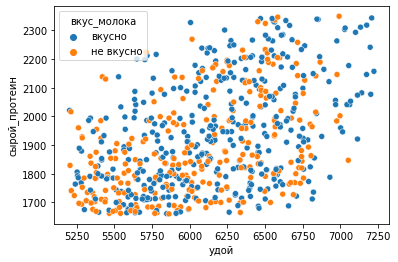

In [52]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue="вкус_молока");

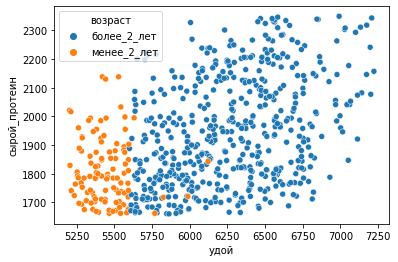

In [53]:
sns.scatterplot(data=ferma_main, x="удой", y="сырой_протеин", hue="возраст");

### Диаграммы рассеяния  `"Удой"|"ЭКЕ"`

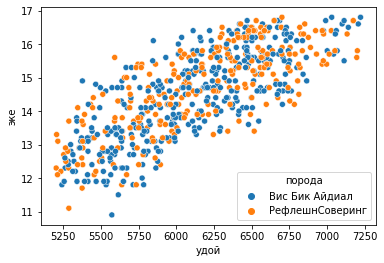

In [54]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue="порода");

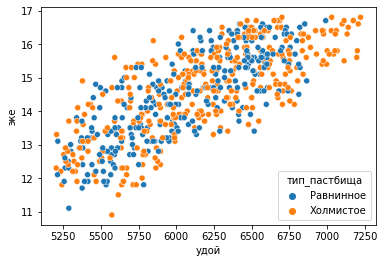

In [55]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue="тип_пастбища");

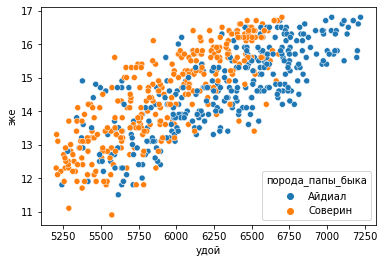

In [56]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue="порода_папы_быка");

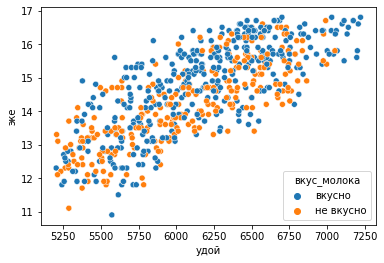

In [57]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue="вкус_молока");

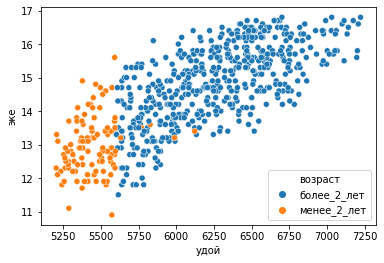

In [58]:
sns.scatterplot(data=ferma_main, x="удой", y="эке", hue="возраст");

### Диаграммы рассеяния  `"Удой"|"СПО"`

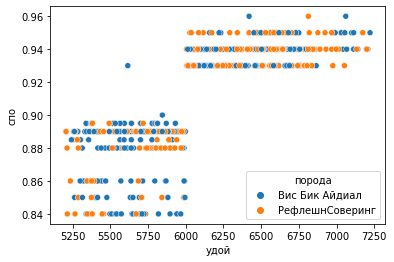

In [59]:
sns.scatterplot(data=ferma_main, x="удой", y="спо", hue="порода");

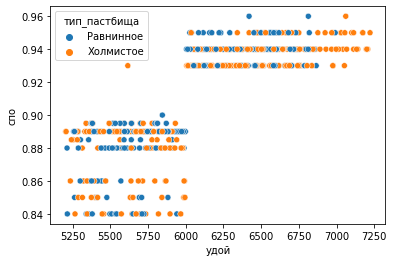

In [60]:
sns.scatterplot(data=ferma_main, x="удой", y="спо", hue="тип_пастбища");

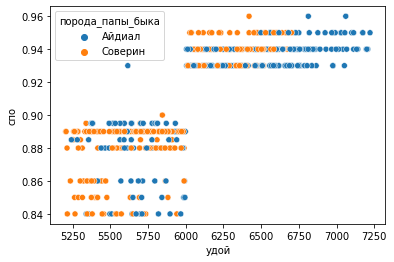

In [61]:
sns.scatterplot(data=ferma_main, x="удой", y="спо", hue="порода_папы_быка");

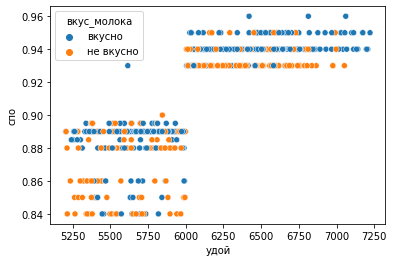

In [62]:
sns.scatterplot(data=ferma_main, x="удой", y="спо", hue="вкус_молока");

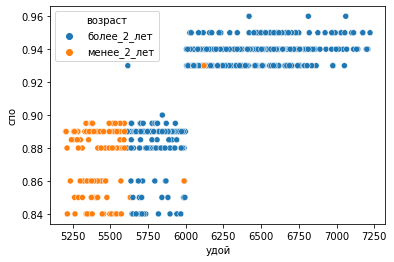

In [63]:
sns.scatterplot(data=ferma_main, x="удой", y="спо", hue="возраст");

### Диаграммы рассеяния  `"Удой"|"Жирность"`

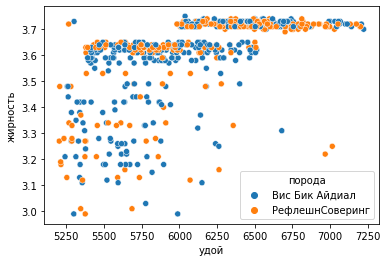

In [64]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue="порода");

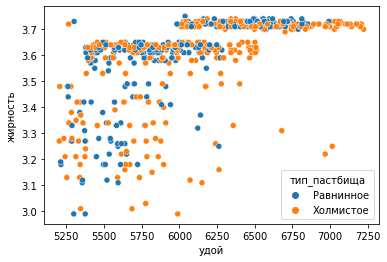

In [65]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue="тип_пастбища");

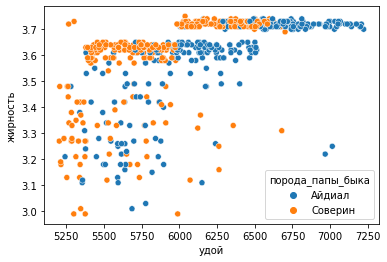

In [66]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue="порода_папы_быка");

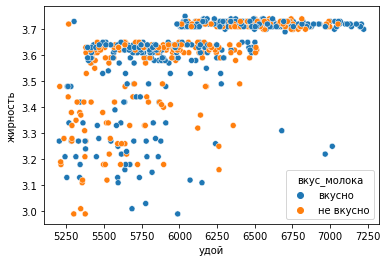

In [67]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue="вкус_молока");

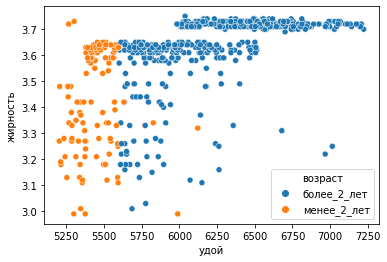

In [68]:
sns.scatterplot(data=ferma_main, x="удой", y="жирность", hue="возраст");

Выводы: На `Удой` значительно влияет `спо` - отношение сахара к протеину в корме коровы должно быть выше 13  и `эке` - показатель питательности корма коровы должен превышать 0.92, а возраст должен быть `более 2 лет`. Желательный тип пастбища - холмистый. Также порода `РефлешнСоверинг` у которых папа бык породы `Айдиал`. Соответственно это влияет на жирность молока 3.6 - 3.7

## Обучение модели линейной регрессии

In [69]:
data = ferma_main.copy()

<a id='model1'></a>
### Первая модель регрессии

(471, 11)

(158, 11)

R2 LinearRegression = 0.8194608020428206


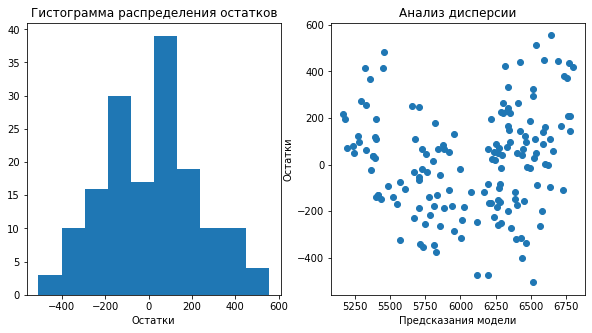

In [70]:
X1 = data.drop('удой', axis=1)
y1 = data['удой']

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, 
    y1,
    random_state=RANDOM_STATE,
    
) 

display(X1_train.shape, X1_test.shape)

cat_col_names1 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names1 = ['эке', 'сырой_протеин', 'спо']

X1_train_scaled = scaler.fit_transform(X1_train[num_col_names1])
X1_test_scaled = scaler.transform(X1_test[num_col_names1])

X1_train_ohe = encoder.fit_transform(X1_train[cat_col_names1])
X1_test_ohe = encoder.transform(X1_test[cat_col_names1])


encoder_col_names1 = encoder.get_feature_names()

X1_train_ohe = pd.DataFrame(X1_train_ohe, columns=encoder_col_names1)
X1_test_ohe = pd.DataFrame(X1_test_ohe, columns=encoder_col_names1)

X1_train_scaled = pd.DataFrame(X1_train_scaled, columns=num_col_names1)
X1_test_scaled = pd.DataFrame(X1_test_scaled, columns=num_col_names1)

X1_train = pd.concat([X1_train_ohe, X1_train_scaled], axis=1)
X1_test = pd.concat([X1_test_ohe, X1_test_scaled], axis=1)

model_lr.fit(X1_train, y1_train)
predictions1 = model_lr.predict(X1_test)

r2_one = r2_score(y1_test, predictions1)
print("R2 LinearRegression =", r2_one)

residuals1 = y1_test - predictions1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals1)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions1, y=residuals1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Значение R² модели: 0.8194608020428206, модель хорошо себя показывает в 82% случаев.

Гистрограмма распределение остатков - бимодальная, её результаты можно улучшить. Анализ дисперсии непостоянный, большой разброс. Такую модель использовать в работе нельзя. Нужны дополнительные исследования.

### Вторая модель регрессии

In [71]:
data.loc[data['спо'] > 0.92, 'спо'] = 1
data.loc[data['спо'] < 0.92, 'спо'] = 0

In [72]:
data['эке_в_квадрате'] = data['эке'] ** 2

(471, 12)

(158, 12)

R2 LinearRegression = 0.8440612517381653


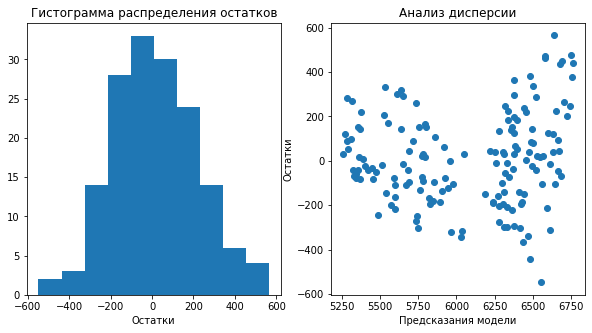

In [73]:
X2 = data.drop('удой', axis=1)
y2 = data['удой']

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, 
    y2,
    random_state=RANDOM_STATE
) 

display(X2_train.shape, X2_test.shape)

cat_col_names2 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
num_col_names2 = ['сырой_протеин', 'спо', 'эке_в_квадрате']

X2_train_scaled = scaler.fit_transform(X2_train[num_col_names2])
X2_test_scaled = scaler.transform(X2_test[num_col_names2])

X2_train_ohe = encoder.fit_transform(X2_train[cat_col_names2])
X2_test_ohe = encoder.transform(X2_test[cat_col_names2])

encoder_col_names2 = encoder.get_feature_names()

X2_train_ohe = pd.DataFrame(X2_train_ohe, columns=encoder_col_names2)
X2_test_ohe = pd.DataFrame(X2_test_ohe, columns=encoder_col_names2)

X2_train_scaled = pd.DataFrame(X2_train_scaled, columns=num_col_names2)
X2_test_scaled = pd.DataFrame(X2_test_scaled, columns=num_col_names2)

X2_train = pd.concat([X2_train_ohe, X2_train_scaled], axis=1)
X2_test = pd.concat([X2_test_ohe, X2_test_scaled], axis=1)

model_lr.fit(X2_train, y2_train)
predictions2 = model_lr.predict(X2_test)

r2_two = r2_score(y2_test, predictions2)
print("R2 LinearRegression =", r2_two)

residuals2 = y2_test - predictions2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions2, y=residuals2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Значение R² модели: 0.8440612517381653, модель хорошо себя показывает в 84% случаев.

Гистрограмма распределение остатков - "колокол", симметричная, нормальная. Разброс дисперсии стал лучше, но непостоянный разброс еще имеется.

### Третья модель регрессии

In [74]:
display(data.shape)
ferma_dad.shape

(629, 13)

(629, 2)

In [75]:
data_name = data.merge(ferma_dad, on='id')
data_name.shape

(629, 14)

(471, 13)

(158, 13)

R2 LinearRegression = 0.862733539068201


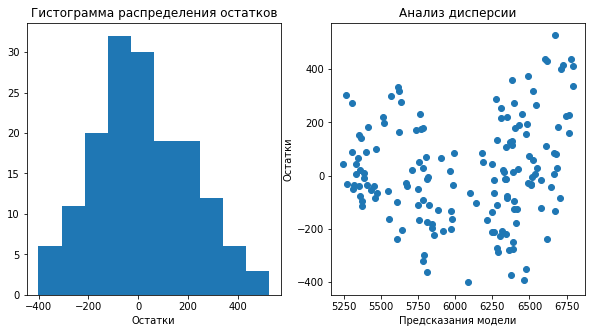

In [76]:
X3 = data_name.drop('удой', axis=1)
y3 = data_name['удой']

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, 
    y3,
    random_state=RANDOM_STATE
) 

display(X3_train.shape, X3_test.shape)

cat_col_names3 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names3 = ['сырой_протеин', 'спо', 'эке_в_квадрате']

X3_train_scaled = scaler.fit_transform(X3_train[num_col_names3])
X3_test_scaled = scaler.transform(X3_test[num_col_names3])

X3_train_ohe = encoder.fit_transform(X3_train[cat_col_names3])
X3_test_ohe = encoder.transform(X3_test[cat_col_names3])

encoder_col_names3 = encoder.get_feature_names()

X3_train_ohe = pd.DataFrame(X3_train_ohe, columns=encoder_col_names3)
X3_test_ohe = pd.DataFrame(X3_test_ohe, columns=encoder_col_names3)

X3_train_scaled = pd.DataFrame(X3_train_scaled, columns=num_col_names3)
X3_test_scaled = pd.DataFrame(X3_test_scaled, columns=num_col_names3)

X3_train = pd.concat([X3_train_ohe, X3_train_scaled], axis=1)
X3_test = pd.concat([X3_test_ohe, X3_test_scaled], axis=1)

model_lr.fit(X3_train, y3_train)
predictions3 = model_lr.predict(X3_test)

r2_three = r2_score(y3_test, predictions3)
print("R2 LinearRegression =", r2_three)

residuals3 = y3_test - predictions3

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions3, y=residuals3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Значение R² модели: 0.862733539068201, модель хорошо себя показывает в 86% случаев.

Гистрограмма распределение остатков - нормальная. Нужны дополнительные исследования. Модель подходит

<a id='metrics1'></a>
### MAE, MSE, RMSE

In [77]:
mae1 = mean_absolute_error(y1_test, predictions1)

In [78]:
mae2 = mean_absolute_error(y2_test, predictions2)

In [79]:
mae3 = mean_absolute_error(y3_test, predictions3)

In [80]:
print(f'MAE1 = {mae1:.0f}, MAE2 = {mae2:.0f}, MAE3 = {mae3:.0f}')

MAE1 = 181, MAE2 = 164, MAE3 = 154


In [81]:
mse1 = mean_squared_error(y1_test, predictions1)

In [82]:
mse2 = mean_squared_error(y2_test, predictions2)

In [83]:
mse3 = mean_squared_error(y3_test, predictions3)

In [84]:
print(f'MSE1 = {mse1:.0f}, MSE2 = {mse2:.0f}, MSE3 = {mse3:.0f}')

MSE1 = 49471, MSE2 = 42730, MSE3 = 37613


In [85]:
rmse1 = mean_squared_error(y1_test, predictions1, squared=False)

In [86]:
rmse2 = mean_squared_error(y2_test, predictions2, squared=False)

In [87]:
rmse3 = mean_squared_error(y3_test, predictions3, squared=False)

In [88]:
print(f'RMSE1 = {rmse1:.0f}, RMSE2 = {rmse2:.0f}, RMSE3 = {rmse3:.0f}')

RMSE1 = 222, RMSE2 = 207, RMSE3 = 194


In [89]:
predictions_train = model_lr.predict(X3_train)
residuals_train = y3_train - predictions_train

In [90]:
residuals_train.quantile(0.025)

-357.92379114925893

In [91]:
residuals_train.quantile(0.975)

364.9085963695875

<a id='result1'></a>
### `"Удой"` коров для покупки

In [92]:
ferma_main[['эке', 'сырой_протеин', 'спо']].mean()

эке                14.543879
сырой_протеин    1923.364070
спо                 0.913116
dtype: float64

In [93]:
cow_buy['эке'] = (ferma_main['эке'].mean() + ferma_main['эке'].mean() * 0.05).round(1)

In [94]:
cow_buy['сырой_протеин'] = (ferma_main['сырой_протеин'].mean() + ferma_main['сырой_протеин'].mean() * 0.05).round(0)

In [95]:
cow_buy['спо'] = (ferma_main['спо'].mean() + ferma_main['спо'].mean() * 0.05).round(2)

In [96]:
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_белок,возраст,эке,сырой_протеин,спо
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.3,2020.0,0.96
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.3,2020.0,0.96
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.3,2020.0,0.96
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.3,2020.0,0.96
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.3,2020.0,0.96


In [97]:
X3 = data_name.drop('удой', axis=1)
y3 = data_name['удой']

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, 
    y3,
    random_state=RANDOM_STATE
) 

cat_col_names3 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names3 = ['эке', 'сырой_протеин', 'спо']

X3_train_scaled = scaler.transform(X3_train[num_col_names3])
X3_test_scaled = scaler.transform(X3_test[num_col_names3])

X3_train_ohe = encoder.transform(X3_train[cat_col_names3])
X3_test_ohe = encoder.transform(X3_test[cat_col_names3])

encoder_col_names3 = encoder.get_feature_names()

X3_train_ohe = pd.DataFrame(X3_train_ohe, columns=encoder_col_names3)
X3_test_ohe = pd.DataFrame(X3_test_ohe, columns=encoder_col_names3)

X3_train_scaled = pd.DataFrame(X3_train_scaled, columns=num_col_names3)
X3_test_scaled = pd.DataFrame(X3_test_scaled, columns=num_col_names3)

X3_train = pd.concat([X3_train_ohe, X3_train_scaled], axis=1)
X3_test = pd.concat([X3_test_ohe, X3_test_scaled], axis=1)

model_lr.fit(X3_train, y3_train)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['эке', 'сырой_протеин', 'спо']

cow_buy_scaled = scaler.transform(cow_buy[num_col_names])
cow_buy_ohe = encoder.transform(cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names()
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)
cow_buy_test = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

predicted_cow_buy = model_lr.predict(cow_buy_test)

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

+
</div>

In [98]:
predicted_cow_buy

array([6542.08090093, 6291.19021415, 6281.46183863, 6584.93807397,
       6533.83967656, 6343.00645363, 6542.08090093, 6492.33322141,
       6281.46183863, 6383.79506672, 6337.7194614 , 6544.14946088,
       6542.08090093, 6084.08052253, 6281.46183863, 6584.93807397,
       6337.7194614 , 6343.00645363, 6492.33322141, 6533.83967656])

Выбрали третью модель с большей вероятностью и меньшими погрешностями.

## Обучение модели логистической регрессии

<a id='model2'></a>
### Обучение модели регресии для `"Вкус молока"`

In [99]:
display(ferma_main.shape)
ferma_dad.shape

(629, 12)

(629, 2)

In [100]:
ferma_main = ferma_main.merge(ferma_dad, on='id')

In [101]:
ferma_main.shape

(629, 13)

In [102]:
ferma_main.loc[ferma_main['вкус_молока'] == 'вкусно', 'вкус_молока'] = 1
ferma_main.loc[ferma_main['вкус_молока'] == 'не вкусно', 'вкус_молока'] = 0
ferma_main['вкус_молока'] = ferma_main['вкус_молока'].astype('int')

accuracy:  0.608
recall:  0.722
precision:  0.667


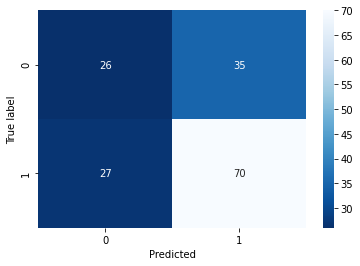

In [103]:
X = ferma_main.drop('вкус_молока', axis=1)
y = ferma_main['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    random_state=RANDOM_STATE
) 



cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) 

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('accuracy: ', round(accuracy,3))
print('recall: ', round(recall,3))
print('precision: ', round(precision,3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

<a id='metrics2'></a>
### Анализ модели логистической регрессии

Для заказчика главное вкусное молоко, это значит, что модель 100% должна определить молоко вкусным, и не допустить ошибки. Поэтому нам важна метрика Precision равная "1", т.е. не допустить ошибки первого рода.

In [104]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)


thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 4,endpoint=False)]

columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda i: 1 if i > 0.81 else 0 )
    
print(data.head(20))

     y_valid   y_proba  y_pred_0.1  y_pred_0.32  y_pred_0.55  y_pred_0.78
17         1  0.872542           1            1            1            1
85         1  0.863137           1            1            1            1
56         1  0.831437           1            1            1            1
61         1  0.825558           1            1            1            1
77         1  0.823129           1            1            1            1
96         1  0.812497           1            1            1            1
111        0  0.809498           0            0            0            0
116        0  0.808641           0            0            0            0
47         1  0.805771           0            0            0            0
135        0  0.793597           0            0            0            0
65         1  0.791342           0            0            0            0
83         1  0.790072           0            0            0            0
1          1  0.789397           0    

In [105]:
recall = recall_score(data['y_valid'], data['y_pred_0.1'])
recall

0.061855670103092786

In [106]:
precision = precision_score(data['y_valid'], data['y_pred_0.1'])
precision

1.0

При пороге 0.6 precision будет равен 0.75, т.е. 75% что молоко будет вкусным, а Recall будет  0.5, т.е. около 50% вкусного молока модель упустит. При пороге ниже 0.6 процент падает, если выше, то процент увеличивается всего на 5%, но упускается много вкусных коров. Поэтому порог в 0.6 я считаю оптимальным. Precision будет равен 1 при пороге 0.81.

<a id='result2'></a>
### Прогноз модели "Вкусного молока" для покупки

In [107]:
cow_buy['удой'] = predicted_cow_buy

In [108]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['эке', 'сырой_протеин', 'спо', 'текущая_жирность', 'текущий_белок']

cow_buy_scaled = scaler.transform(cow_buy[num_col_names])
cow_buy_ohe = encoder.transform(cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names()
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)
cow_buy_test = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

clf_predicted_cow_buy = clf.predict(cow_buy_test)

In [109]:
cow_buy['вкус_молока'] = clf_predicted_cow_buy

In [110]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_белок,возраст,эке,сырой_протеин,спо,удой,вкус_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.3,2020.0,0.96,6542.080901,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.3,2020.0,0.96,6291.190214,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.3,2020.0,0.96,6281.461839,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.3,2020.0,0.96,6584.938074,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.3,2020.0,0.96,6533.839677,1
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.3,2020.0,0.96,6343.006454,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.3,2020.0,0.96,6542.080901,1
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.3,2020.0,0.96,6492.333221,1
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.3,2020.0,0.96,6281.461839,1
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.3,2020.0,0.96,6383.795067,1


<a id='conclusion'></a>
## Итоговые выводы

**Вывод:** Получив и изучив данные, провели их предобработку и привели в нужный формат для дальнейшего анализа. Построили графики и изучив их обнаружив аномалии избавились от них. Провели корреляционный анализ простроив диаграммы рассеяния, зависимости целевого признака - "Удоя" от других данных.

Для прогноза `Удой` обучили три модели линейной регрессии. На вход для построения первой модели была предоставлена таблица `'ferma_main'`. Эти данные были поделены на тренировочные, на которых модель обучалась и тестовые для итогового качества модели. Модель хорошо себя показывала в 82% случаев. Но изучив остатки и дисперсию данной модели, какие-то данные сильно влияли на нее, такую можедь использовать нельзя. Нужны были дополнительные исследования. Во второй моделе изменили и добавили данные, которые влияли на поведение нашей модели. Модель показала себя лучше, уже 84% и независимое распределение дисперсии. В третью модель добавили таблицу с именами пап `ferma_dad`, и обучили модель на этих данных, уже 86%. Добавляя новые данные, возможно улучшение качества модели.

Оценив качество каждой модели по трём метрикам: MSE(среднеквадратичная ошибка), MAE(средняя абсолютная ошибка), RMSE(корень среднеквадратичной ошибки) и проанализировав выбрали третью модель. Использовав ее вычислили предположительный Удой коров из таблицы `cow_buy` и добавили в таблицу. 

Для прогноза `Вкус молока` обучили модель логистической регрессии. Проанализировав и рассчитав метрики accuracy(доля верных ответов модели), recall(полнота), precision(точность). Получили прогноз, записав в таблицу.

Исходя из проделанного анализа, рекомендую купить 11 коров из списка, т.к. модели могут ошибаться. При изменения рациона как в таблице, т.е. увеличении ЭКЕ, СПО и протеина выбирать с высокими показателями удоя. А также высокими показателями жирности и белка, старше 2 лет. Желательно породы РефлешнСоверинг, папы Айдиал, тип пастбища Холмистое для вкусного молока. Не выбирать имя папы быка Геркулес, особенно породы Соверин. С осторожностью Соловчик.

Для линейной регрессии желательно независимые данные с минимальными отклонениями. Для логистической же наоборот важна зависимость, но только одних данных. Плюс добавление новых данных влияет на качество модели. После покупки также составить данные этих коров за несколько месяцев и затем включить их в обчк